In [ ]:
##The goal of this assignment is to compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines)

In [2]:
##Import Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
# modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
##Read bank-additional-full.csv
df = pd.read_csv(r'data/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df['y'].value_counts(normalize=True).round(2)

y
no     0.89
yes    0.11
Name: proportion, dtype: float64

In [6]:
##Check cardinality
# Calculate cardinality
cardinality = {col: df[col].nunique() for col in df.columns}

# Print the results
for col, card in cardinality.items():
    print(f"Column '{col}' has {card} unique values.")

Column 'age' has 78 unique values.
Column 'job' has 12 unique values.
Column 'marital' has 4 unique values.
Column 'education' has 8 unique values.
Column 'default' has 3 unique values.
Column 'housing' has 3 unique values.
Column 'loan' has 3 unique values.
Column 'contact' has 2 unique values.
Column 'month' has 10 unique values.
Column 'day_of_week' has 5 unique values.
Column 'duration' has 1544 unique values.
Column 'campaign' has 42 unique values.
Column 'pdays' has 27 unique values.
Column 'previous' has 8 unique values.
Column 'poutcome' has 3 unique values.
Column 'emp.var.rate' has 10 unique values.
Column 'cons.price.idx' has 26 unique values.
Column 'cons.conf.idx' has 26 unique values.
Column 'euribor3m' has 316 unique values.
Column 'nr.employed' has 11 unique values.
Column 'y' has 2 unique values.


In [7]:
# List of columns to drop
columns_to_drop = ['education', 'month', 'day_of_week']  
df = df.drop(columns=columns_to_drop)

##Drop columns with hight cardinality
# Define the cardinality threshold
threshold = 100  # Adjust this threshold as needed

# Calculate cardinality for each column
cardinality = {col: df[col].nunique() for col in df.columns}

# Determine columns to drop
columns_to_drop = [col for col, card in cardinality.items() if card > threshold]

# Drop the high cardinality columns
df_dropped = df.drop(columns=columns_to_drop)

# Print columns that were dropped
print(f"Columns dropped due to high cardinality: {columns_to_drop}")

# Optionally, save the new DataFrame to a CSV file
##df_dropped.to_csv('filtered_dataset.csv', index=False)
df = df_dropped



Columns dropped due to high cardinality: ['duration', 'euribor3m']


In [8]:
# Drop rows with any NaN values
df_cleaned_rows = df.dropna()

# Drop columns with any NaN values
df_cleaned_columns = df.dropna(axis=1)

# Drop rows where all values are NaN
df_cleaned_all_rows = df.dropna(how='all')

# Drop columns where all values are NaN
df_cleaned_all_columns = df.dropna(axis=1, how='all')

# Fill NaN values with a specific value (e.g., 0)
df_filled = df.fillna(0)

df = df_filled
df.head()

,age,job,marital,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
1,57,services,married,unknown,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
2,37,services,married,no,yes,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
3,40,admin.,married,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
4,56,services,married,no,no,yes,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no


In [9]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

age               0
job               0
marital           0
default           0
housing           0
loan              0
contact           0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
nr.employed       0
y                 0
dtype: int64


In [10]:
df.head()

,age,job,marital,default,housing,loan,contact,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y
0,56,housemaid,married,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
1,57,services,married,unknown,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
2,37,services,married,no,yes,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
3,40,admin.,married,no,no,no,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no
4,56,services,married,no,no,yes,telephone,1,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no


In [11]:
df.dtypes

age                 int64
job                object
marital            object
default            object
housing            object
loan               object
contact            object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
nr.employed       float64
y                  object
dtype: object

In [12]:
df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5228.100000


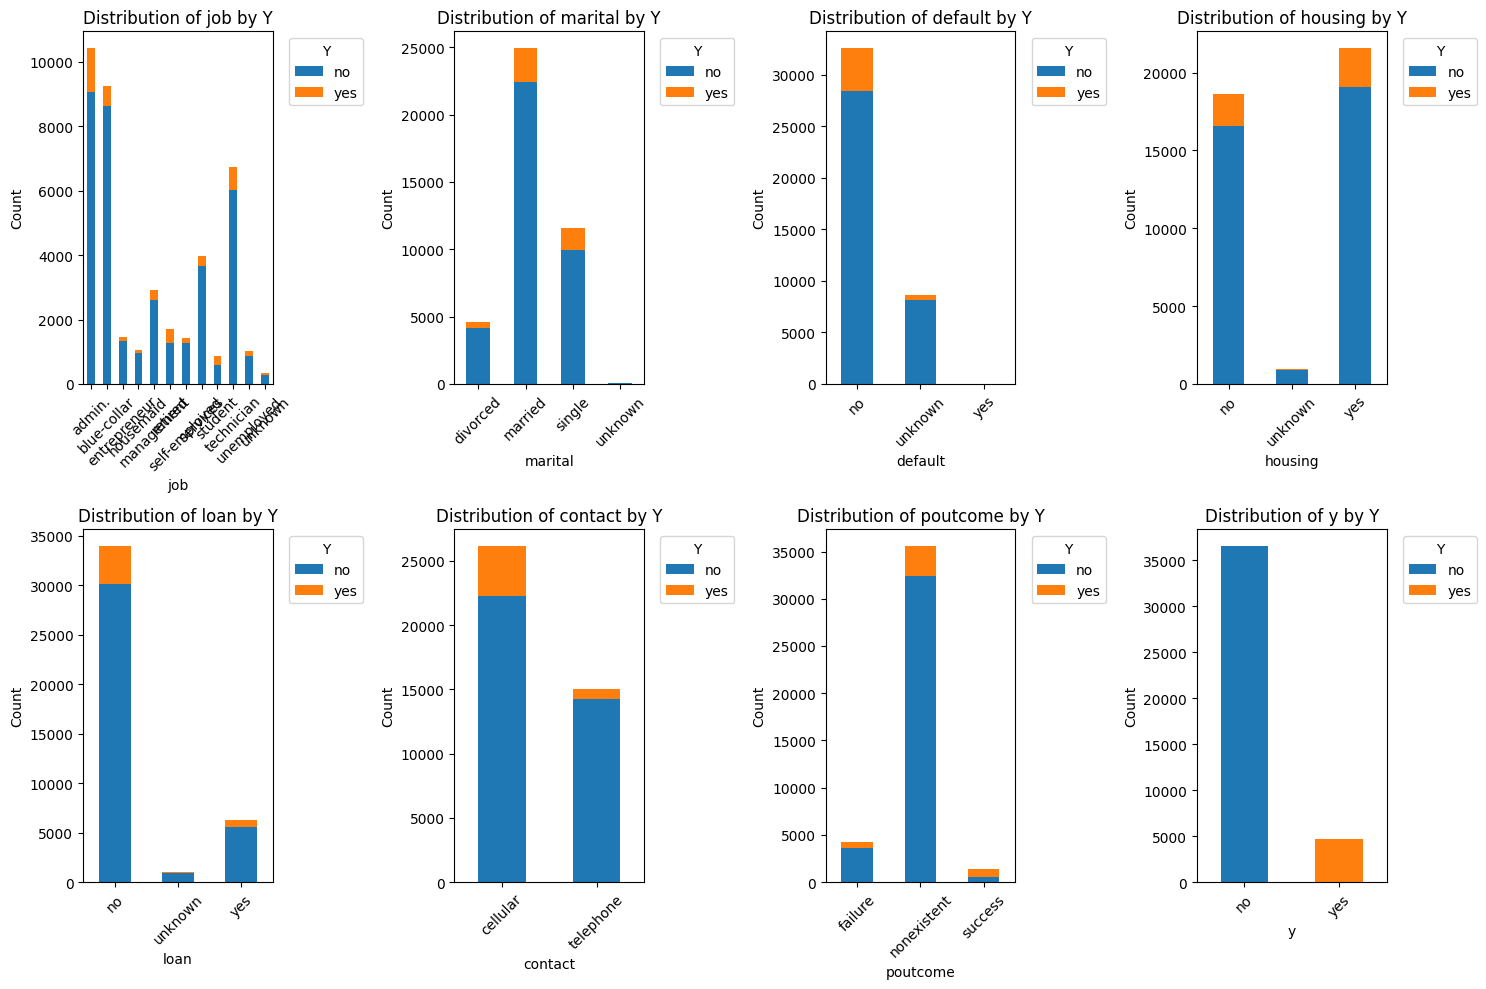

In [13]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Number of categorical columns
n_cols = len(categorical_columns)

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot each categorical column in a subplot
for i, col in enumerate(categorical_columns):
    plt.subplot(2, (n_cols + 1) // 2, i + 1)  # Adjust subplot grid (2 rows by n columns)
    
    # Create a DataFrame with counts for each category of the column, segmented by 'y'
    count_data = df.groupby([col, 'y']).size().unstack(fill_value=0)
    count_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])

    plt.title(f'Distribution of {col} by Y')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Y', labels=df['y'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap

# Save the figure to a file
plt.savefig('images/categorical_distributions_by_y.png', dpi=300)  # Save with 300 DPI resolution

plt.show()

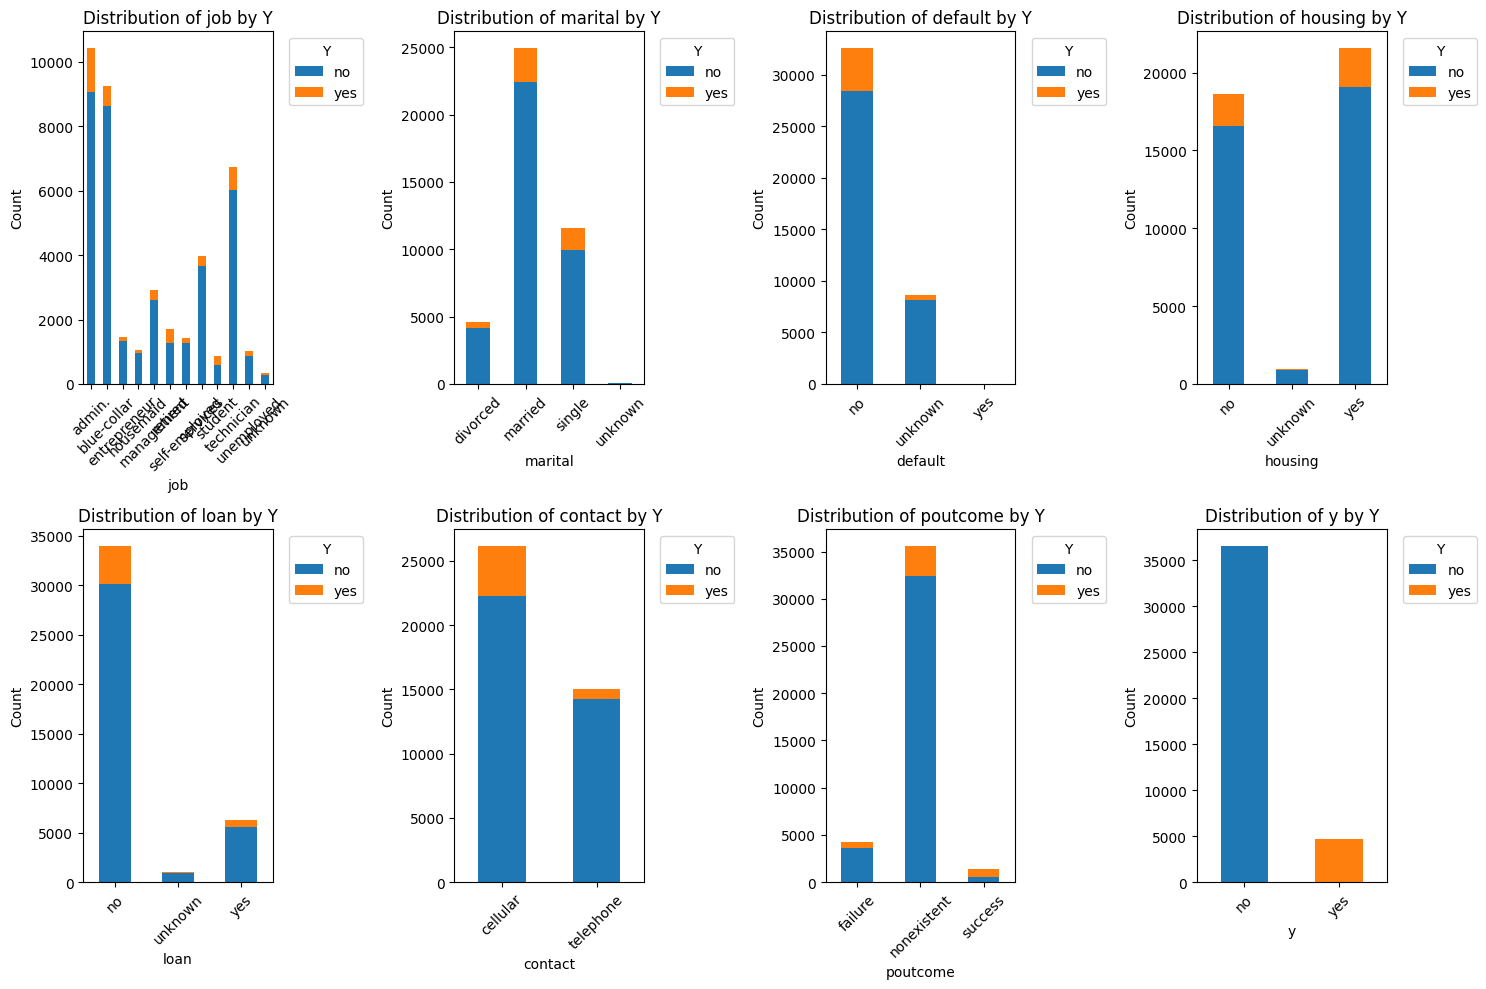

In [14]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Number of categorical columns
n_cols = len(categorical_columns)

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot each categorical column in a subplot
for i, col in enumerate(categorical_columns):
    plt.subplot(2, (n_cols + 1) // 2, i + 1)  # Adjust subplot grid (2 rows by n columns)
    
    # Create a DataFrame with counts for each category of the column, segmented by 'y'
    count_data = df.groupby([col, 'y']).size().unstack(fill_value=0)
    count_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])

    plt.title(f'Distribution of {col} by Y')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Y', labels=df['y'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap

# Save the figure to a file
plt.savefig('images/categorical_distributions_by_y.png', dpi=300)  # Save with 300 DPI resolution

plt.show()

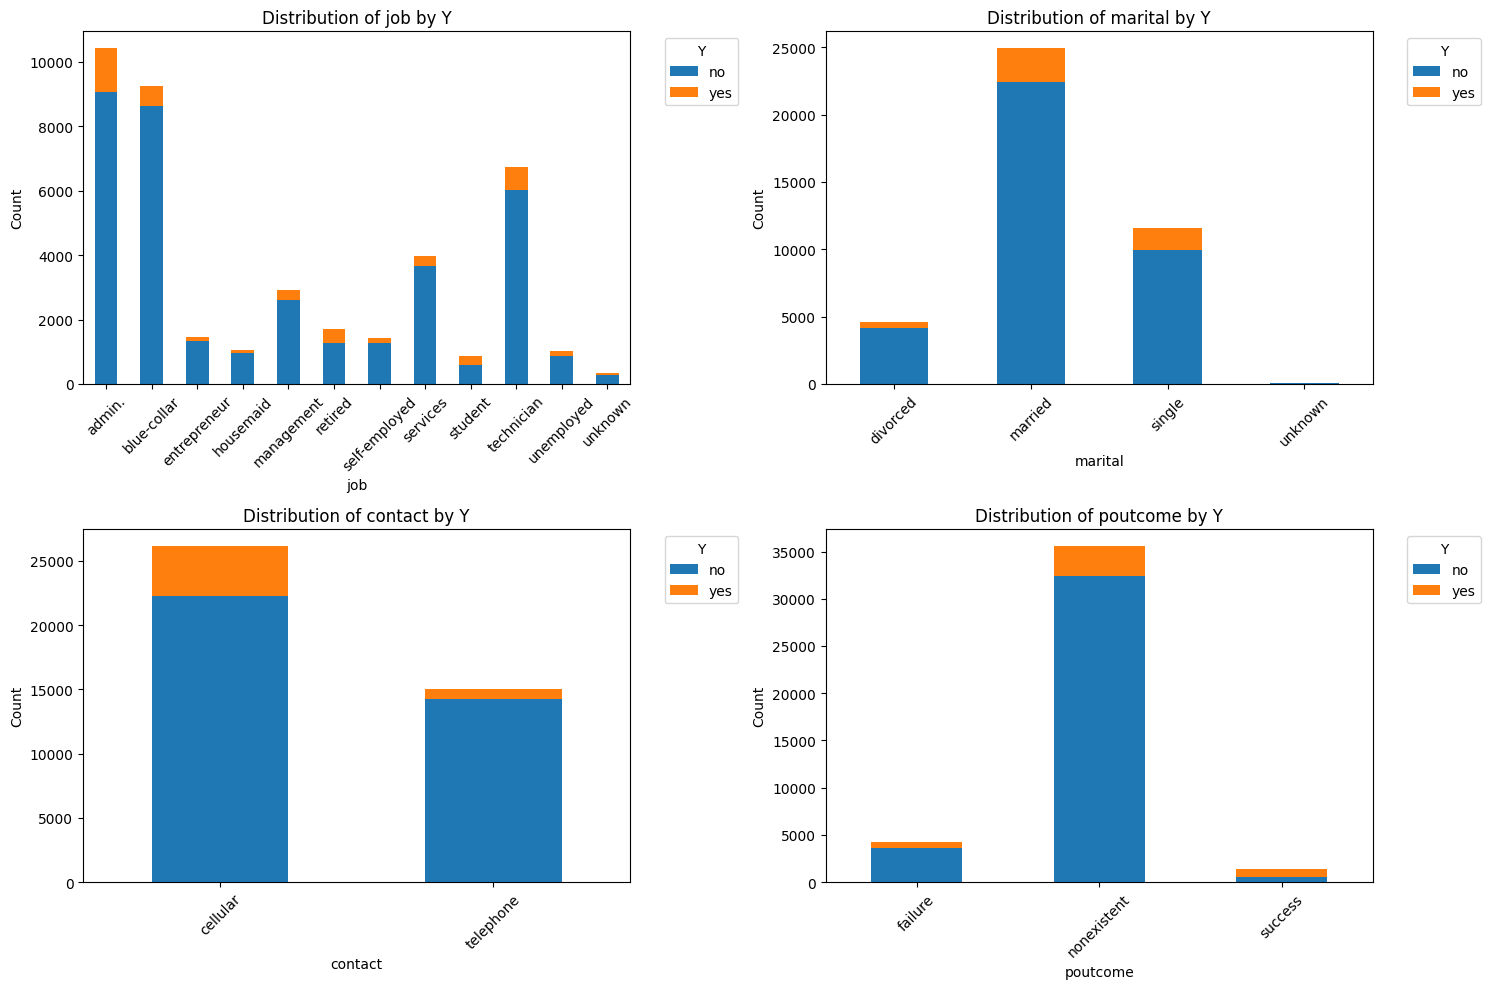

In [15]:
# Define the categorical columns you want to plot
categorical_columns = ['job', 'marital', 'contact', 'poutcome']  # Ensure column names are correct

# Number of categorical columns
n_cols = len(categorical_columns)

# Create a figure with subplots
plt.figure(figsize=(15, 10))

# Plot each categorical column in a subplot
for i, col in enumerate(categorical_columns):
    plt.subplot(2, (n_cols + 1) // 2, i + 1)  # Adjust subplot grid (2 rows by number of columns)
    
    # Create a DataFrame with counts for each category of the column, segmented by 'y'
    count_data = df.groupby([col, 'y']).size().unstack(fill_value=0)
    count_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#1f77b4', '#ff7f0e'])
    
    plt.title(f'Distribution of {col} by Y')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Y', labels=df['y'].unique(), bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent overlap

# Save the figure to a file with the .png extension
plt.savefig('categorical_distributions.png', dpi=300)  # Save with 300 DPI resolution

plt.show()

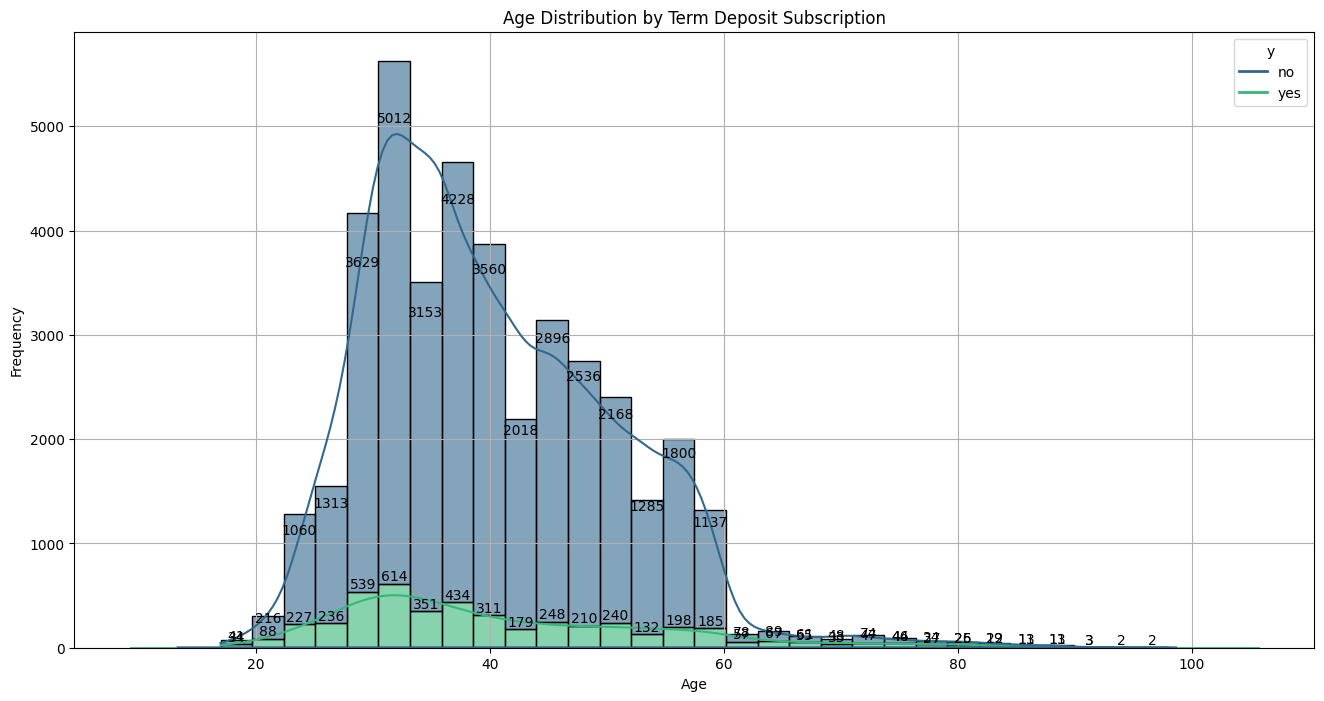

In [16]:
##Target variable Term deposit y (yes or no)
plt.figure(figsize=(16, 8))

# Plot histogram with KDE
histplot = sns.histplot(data=df, x='age', hue='y', multiple='stack', kde = True,palette='viridis', bins=30, alpha=0.6)
sns.kdeplot(data=df, x='age', hue='y', palette='viridis', linewidth=2)

# Add a title and labels
plt.title('Age Distribution by Term Deposit Subscription')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add a grid for better readability
plt.grid(True)

# Annotate the bars
for patch in histplot.patches:
    height = patch.get_height()
    if height > 0:
        plt.text(patch.get_x() + patch.get_width() / 2, height,
                 f'{int(height)}',  # The count of values in this bin
                 ha='center', va='bottom', fontsize=10, color='black')

# Show the plot
# Save the figure to a file
plt.savefig('images/Age_Distribution_by_Term_Deposit_Subscription', dpi=300)  # Save with 300 DPI resolution

plt.show()

In [17]:
# Filter the DataFrame for accepted term deposits
df_accepted = df[df['y'] == 'yes']

# Group by 'default' status and calculate statistical measures
age_stats_by_default = df_accepted.groupby('default')['age'].agg(['mean', 'median', 'std', 'var', 'min', 'max', lambda x: x.quantile(0.25), lambda x: x.quantile(0.5), lambda x: x.quantile(0.75), 'count'])

# Rename the quantile columns for clarity
age_stats_by_default.rename(columns={'<lambda_0>': '25th Percentile', '<lambda_1>': '50th Percentile (Median)', '<lambda_2>': '75th Percentile'}, inplace=True)

# Display the results
print("Statistical Measures for Age by Default Status for Accepted Term Deposits:")
age_stats_by_default.head()

Statistical Measures for Age by Default Status for Accepted Term Deposits:


,mean,median,std,var,min,max,25th Percentile,50th Percentile (Median),75th Percentile,count
default,,,,,,,,,,
no,40.496545,36.0,13.820751,191.013155,17,92,30.0,36.0,49.0,4197
unknown,44.860045,43.0,13.380553,179.039192,21,98,35.0,43.0,52.5,443


In [18]:
##Exracting 2 principal components

# Separate features and target
X = df.drop(columns=['y'])
y = df['y']

# Define categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for numerical data: imputation and standardization
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the PCA pipeline
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))])

# Fit and transform the data
X_pca = pca_pipeline.fit_transform(X)

# Extract PCA components
pca = pca_pipeline.named_steps['pca']
components = pca.components_

# Get feature names after one-hot encoding
categorical_feature_names = pca_pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()
feature_names = numerical_features + list(categorical_feature_names)

# Display the components
pca_components = pd.DataFrame(components, columns=feature_names, index=[f'PC{i+1}' for i in range(components.shape[0])])
print("Principal Components:")
pca_components.head()


Principal Components:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,x0_admin.,x0_blue-collar,...,x3_unknown,x3_yes,x4_no,x4_unknown,x4_yes,x5_cellular,x5_telephone,x6_failure,x6_nonexistent,x6_success
PC1,-0.000272,-0.120164,-0.286806,0.377977,-0.518687,-0.406667,-0.095547,-0.496437,0.010354,-0.020530,...,-0.000528,0.021362,0.000214,-0.000528,0.000314,0.133050,-0.133050,0.082663,-0.130788,0.048125
PC2,0.300374,0.041465,-0.569292,0.420036,0.202565,0.346172,0.425586,0.014286,-0.010520,-0.017077,...,0.001419,-0.028704,0.002787,0.001419,-0.004206,-0.126594,0.126594,0.005585,-0.100983,0.095398


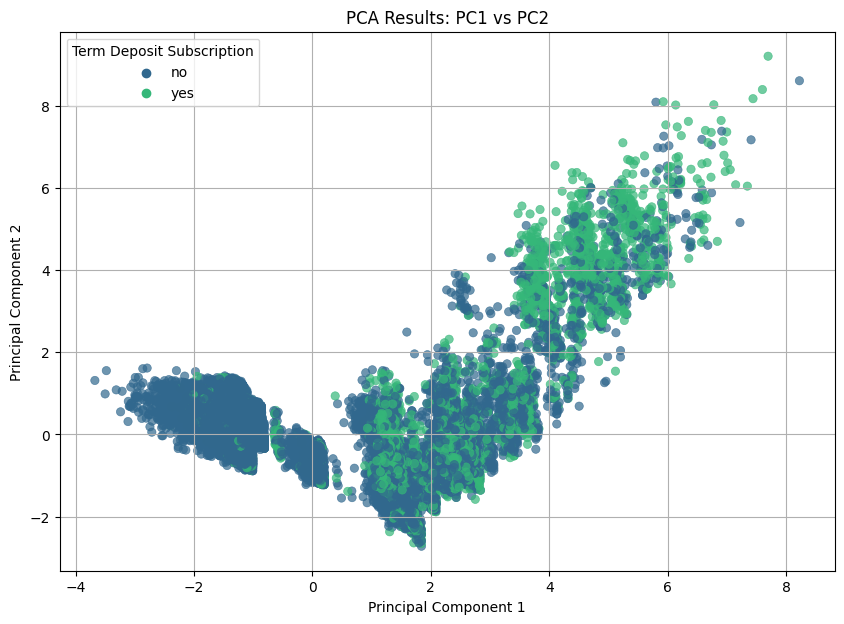

In [19]:
# Create a DataFrame with the PCA results and the target variable
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['y'] = y.values

# Plotting
plt.figure(figsize=(10, 7))

# Plot PC1 vs PC2 colored by target variable
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='y', palette='viridis', alpha=0.7, edgecolor=None)

# Add titles and labels
plt.title('PCA Results: PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Term Deposit Subscription', loc='best')
plt.grid(True)

# Show the plot
plt.savefig('images/PCA_Analysis', dpi=300)  # Save with 300 DPI resolution

plt.show()

Explained variance ratio of each component: [0.28395013 0.1235859 ]
Total explained variance: 0.40753602371057096


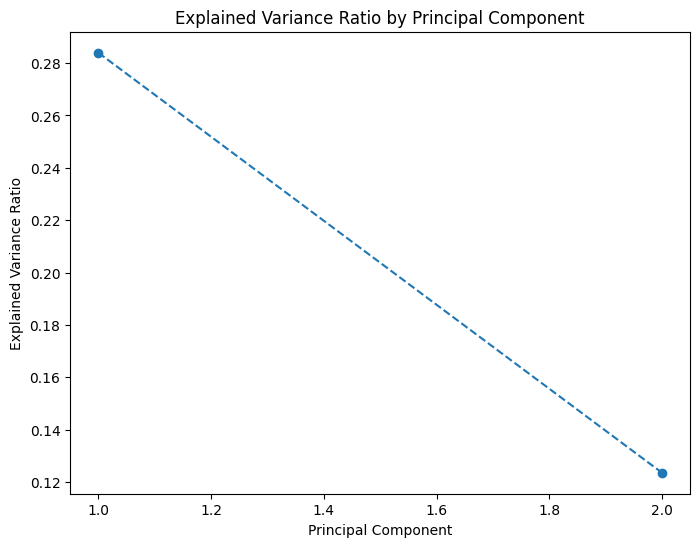

        PC1       PC2
0 -1.216342  1.156106
1 -1.322112  1.240351
2 -1.175230  0.535332
3 -1.202710  0.677354
4 -1.217823  1.131977


In [20]:
# Separate features and target
X = df.drop(columns=['y'])
y = df['y']

# Define categorical and numerical columns
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

# Preprocessing for numerical data: imputation and standardization
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data: imputation and one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the PCA pipeline
pca_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))])  # Change n_components as needed

# Fit and transform the data
X_pca = pca_pipeline.fit_transform(X)

# Display explained variance ratio
pca = pca_pipeline.named_steps['pca']
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio of each component: {explained_variance_ratio}")
print(f"Total explained variance: {sum(explained_variance_ratio)}")

# Plot the explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
# Save and Show the plot
plt.savefig('images/Explained_Var_Ratio_PCA', dpi=300)  # Save with 300 DPI resolution
plt.show()

# Transform the data to the PCA space
df_reduced = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
print(df_reduced.head())

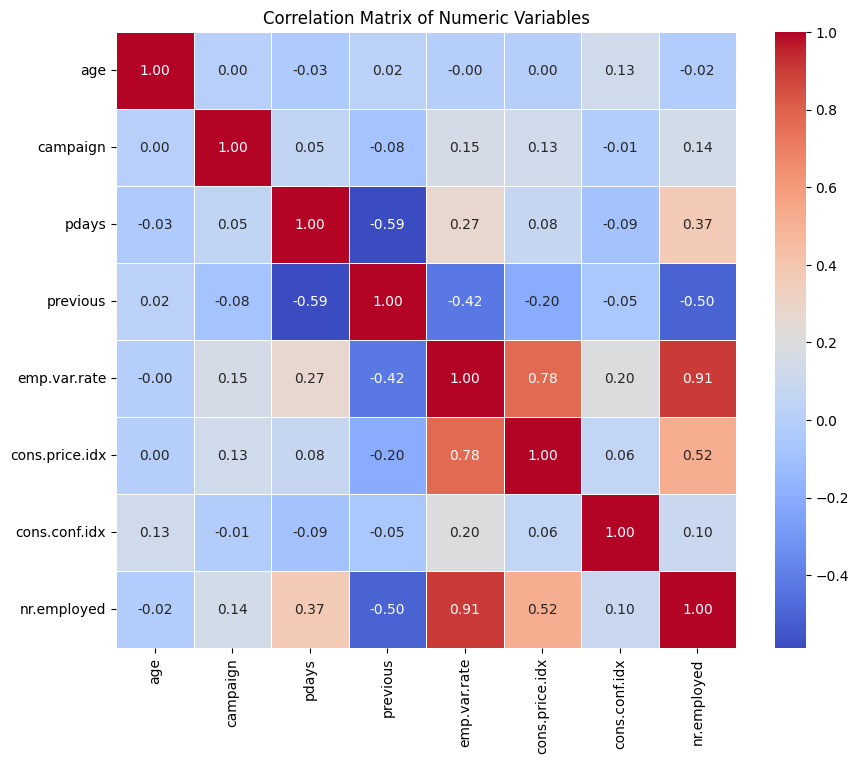

In [21]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables')
# Save and Show the plot
plt.savefig('images/Correlation_Matrix_Num_Var', dpi=300)  # Save with 300 DPI resolution
plt.show()

In [22]:
##there is no impact of previous campaign. Hence,not used
columns_to_drop = ['campaign']  
df = df.drop(columns=columns_to_drop)

In [23]:
##Encode y column to numeric
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform 'y' column and add as a new column
df['y_encoded'] = label_encoder.fit_transform(df['y'])

# Display the DataFrame
df.head()

,age,job,marital,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,y_encoded
0,56,housemaid,married,no,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no,0
1,57,services,married,unknown,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no,0
2,37,services,married,no,yes,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no,0
3,40,admin.,married,no,no,no,telephone,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no,0
4,56,services,married,no,no,yes,telephone,999,0,nonexistent,1.1,93.994,-36.4,5191.0,no,0


In [24]:
X = df.drop(columns='y')
y = df['y']
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
## Preprocessing for numerical data: impute missing values and scalea
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])
# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

In [25]:
##Create column transformer 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [26]:
##Encode all columns
# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each column
df_encoded = df.apply(le.fit_transform)

df_encoded.head()


,age,job,marital,default,housing,loan,contact,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,nr.employed,y,y_encoded
0,39,3,1,0,0,0,1,26,0,1,8,18,16,8,0,0
1,40,7,1,1,0,0,1,26,0,1,8,18,16,8,0,0
2,20,7,1,0,2,0,1,26,0,1,8,18,16,8,0,0
3,23,0,1,0,0,0,1,26,0,1,8,18,16,8,0,0
4,39,7,1,0,0,2,1,26,0,1,8,18,16,8,0,0


In [27]:
##Perform Statistical Test
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical features
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Fit Chi-Squared Test
chi2_values, p_values = chi2(X, y)

# Display results
chi2_df = pd.DataFrame({'Feature': X.columns, 'Chi2 Value': chi2_values, 'P-Value': p_values})
print("Chi-Squared Test Results:")
print(chi2_df.sort_values(by='Chi2 Value', ascending=False))

Chi-Squared Test Results:
           Feature    Chi2 Value        P-Value
14       y_encoded  36548.000000   0.000000e+00
10    emp.var.rate   4026.197024   0.000000e+00
13     nr.employed   3989.738835   0.000000e+00
8         previous   3090.172426   0.000000e+00
7            pdays   2466.672904   0.000000e+00
11  cons.price.idx   1772.878521   0.000000e+00
12   cons.conf.idx    697.611950  9.885589e-154
6          contact    547.958309  3.500598e-121
3          default    321.922903   5.521476e-72
0              age    178.750775   9.082008e-41
9         poutcome     98.231174   3.722828e-23
1              job     90.175533   2.179406e-21
2          marital     27.795598   1.348325e-07
4          housing      4.978734   2.566075e-02
5             loan      1.587004   2.077547e-01


In [28]:
# Create a pipeline with preprocessor and Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear'))  # Adding solver for better compatibility
])

In [29]:
# Prepare features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time

    # Calculate train accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate test accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
    cv_mean_accuracy = np.mean(cv_scores)
    cv_std_accuracy = np.std(cv_scores)

    return train_time, train_accuracy, test_accuracy, cv_mean_accuracy, cv_std_accuracy

# Initialize and evaluate Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_metrics = evaluate_model(logistic_model, X_train, X_test, y_train, y_test)

print("Logistic Regression:")
print(f"Train Time: {logistic_metrics[0]:.4f} seconds")
print(f"Train Accuracy: {logistic_metrics[1]:.4f}")
print(f"Test Accuracy: {logistic_metrics[2]:.4f}")
print(f"CV Mean Accuracy: {logistic_metrics[3]:.4f}")
print(f"CV Std Accuracy: {logistic_metrics[4]:.4f}")

# Initialize and evaluate Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_metrics = evaluate_model(decision_tree_model, X_train, X_test, y_train, y_test)

print("\nDecision Tree Classifier:")
print(f"Train Time: {decision_tree_metrics[0]:.4f} seconds")
print(f"Train Accuracy: {decision_tree_metrics[1]:.4f}")
print(f"Test Accuracy: {decision_tree_metrics[2]:.4f}")
print(f"CV Mean Accuracy: {decision_tree_metrics[3]:.4f}")
print(f"CV Std Accuracy: {decision_tree_metrics[4]:.4f}")

# Initialize and evaluate k-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_metrics = evaluate_model(knn_model, X_train, X_test, y_train, y_test)

print("\nk-Nearest Neighbors:")
print(f"Train Time: {knn_metrics[0]:.4f} seconds")
print(f"Train Accuracy: {knn_metrics[1]:.4f}")
print(f"Test Accuracy: {knn_metrics[2]:.4f}")
print(f"CV Mean Accuracy: {knn_metrics[3]:.4f}")
print(f"CV Std Accuracy: {knn_metrics[4]:.4f}")

# Initialize and evaluate Support Vector Machine
svm_model = SVC(random_state=42)
svm_metrics = evaluate_model(svm_model, X_train, X_test, y_train, y_test)

print("\nSupport Vector Machine:")
print(f"Train Time: {svm_metrics[0]:.4f} seconds")
print(f"Train Accuracy: {svm_metrics[1]:.4f}")
print(f"Test Accuracy: {svm_metrics[2]:.4f}")
print(f"CV Mean Accuracy: {svm_metrics[3]:.4f}")
print(f"CV Std Accuracy: {svm_metrics[4]:.4f}")

Logistic Regression:
Train Time: 0.6039 seconds
Train Accuracy: 1.0000
Test Accuracy: 1.0000
CV Mean Accuracy: 1.0000
CV Std Accuracy: 0.0000

Decision Tree Classifier:
Train Time: 0.0153 seconds
Train Accuracy: 1.0000
Test Accuracy: 1.0000
CV Mean Accuracy: 1.0000
CV Std Accuracy: 0.0000

k-Nearest Neighbors:
Train Time: 0.0800 seconds
Train Accuracy: 0.9331
Test Accuracy: 0.9057
CV Mean Accuracy: 0.6052
CV Std Accuracy: 0.2492

Support Vector Machine:
Train Time: 20.8662 seconds
Train Accuracy: 0.9977
Test Accuracy: 0.9972
CV Mean Accuracy: 0.9833
CV Std Accuracy: 0.0242


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Sample DataFrame (Replace with your actual data)
df_encoded = pd.DataFrame({
    'feature1': np.random.randn(100),
    'feature2': np.random.randn(100),
    'feature3': np.random.randn(100),
    'y': np.random.randint(0, 2, 100)  # Binary target variable
})

# Prepare features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to evaluate model with hyperparameter tuning
def evaluate_model_with_tuning(model, param_grid, X_train, X_test, y_train, y_test):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    train_time = end_time - start_time
    
    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Calculate train accuracy
    y_train_pred = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Calculate test accuracy
    y_test_pred = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Perform cross-validation
    cv_scores = cross_val_score(best_model, X, y, cv=5)  # 5-fold cross-validation
    cv_mean_accuracy = np.mean(cv_scores)
    cv_std_accuracy = np.std(cv_scores)

    return train_time, train_accuracy, test_accuracy, cv_mean_accuracy, cv_std_accuracy, grid_search.best_params_

# Hyperparameter grids for models
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10]
    },
    'k-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Support Vector Machine': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42)
}

results = []

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    param_grid = param_grids[model_name]
    metrics = evaluate_model_with_tuning(model, param_grid, X_train, X_test, y_train, y_test)
    results.append({
        'Model': model_name,
        'Train Time (s)': metrics[0],
        'Train Accuracy': metrics[1],
        'Test Accuracy': metrics[2],
        'CV Mean Accuracy': metrics[3],
        'CV Std Accuracy': metrics[4],
        'Best Params': metrics[5]
    })

# Create DataFrame for results
results_df = pd.DataFrame(results)

# Print results in tabular format
print(results_df.to_string(index=False))


Evaluating Logistic Regression...

Evaluating Decision Tree...

Evaluating k-Nearest Neighbors...

Evaluating Support Vector Machine...
                 Model  Train Time (s)  Train Accuracy  Test Accuracy  CV Mean Accuracy  CV Std Accuracy                                   Best Params
   Logistic Regression        3.780599        0.542857       0.500000              0.51         0.020000                 {'C': 0.01, 'solver': 'saga'}
         Decision Tree        0.341747        1.000000       0.566667              0.47         0.102956   {'max_depth': None, 'min_samples_split': 2}
   k-Nearest Neighbors        0.111976        0.657143       0.466667              0.45         0.063246      {'n_neighbors': 5, 'weights': 'uniform'}
Support Vector Machine        0.180856        0.542857       0.500000              0.53         0.024495 {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
